# Image Manipulation

Let's built a simple image manipulation API using Pillow and an LLM!

The type of supported operations are limited to the list of functions created.

The list of functions was generated using chat gpt (including type annotations and doc-strings).

`Kork` doesn't know how to use kwargs yet, so the doc-strings that takes kwargs were modified with an explanation of what default value to use.

In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.insert(0, "../")

Let's install Pillow

In [2]:
!pip install Pillow > /dev/null


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [3]:
from PIL import Image, ImageOps, ImageFilter

Let's create a functions manually

In [4]:
def resize(img: Image.Image, width: int, height: int) -> Image:
    """Use to resize an image to the given width and height"""
    return img.resize((width, height))


def upscale(img: Image.Image, scale: float) -> Image.Image:
    """Upscale the image by the given scale"""
    height = int(img.height * scale)
    width = int(img.width * scale)
    return img.resize((width, height))


def downscale(img: Image.Image, scale: float) -> Image.Image:
    """Downscale the image by the given scale"""
    return upscale(img, 1 / scale)


def apply_sepia_filter(img: Image.Image) -> Image:
    """Apply a sepia filter."""
    # Convert the image to grayscale
    grayscale_image = img.convert("L")
    # Apply sepia filter
    sepia_image = ImageOps.colorize(grayscale_image, "#704214", "#C0C090")
    return sepia_image

Below is a list of functions that was created (mostly) by chat gpt, so we don't have to write a lot of boiler plate by hand.

In [5]:
def apply_blur(img: Image.Image, radius: int = 2) -> Image.Image:
    """Apply a blur filter to the image. Use default radius of 2, if not specified.

    Args:
        img (Image.Image): The input image.
        radius (int): The blur radius. Default is 2.

    Returns:
        Image.Image: The filtered image.
    """
    return img.filter(ImageFilter.GaussianBlur(radius=radius))


def apply_contour(img: Image.Image) -> Image.Image:
    """Apply a contour filter to the image.

    Args:
        img (Image.Image): The input image.

    Returns:
        Image.Image: The filtered image.
    """
    return img.filter(ImageFilter.CONTOUR())


def apply_detail(img: Image.Image) -> Image.Image:
    """Apply a detail filter to the image.

    Args:
        img (Image.Image): The input image.
        detail (int): The level of detail enhancement. Default is 2.

    Returns:
        Image.Image: The filtered image.
    """
    return img.filter(ImageFilter.DETAIL())


def apply_edge_enhance(img: Image.Image) -> Image.Image:
    """Apply an edge enhance filter to the image.

    Args:
        img (Image.Image): The input image.

    Returns:
        Image.Image: The filtered image.
    """
    return img.filter(ImageFilter.EDGE_ENHANCE())


def apply_edge_enhance_more(img: Image.Image) -> Image.Image:
    """Apply a stronger edge enhance filter to the image.

    Args:
        img (Image.Image): The input image.

    Returns:
        Image.Image: The filtered image.
    """
    return img.filter(ImageFilter.EDGE_ENHANCE_MORE())


def apply_emboss(img: Image.Image) -> Image.Image:
    """Apply an emboss filter to the image.

    Args:
        img (Image.Image): The input image.

    Returns:
        Image.Image: The filtered image.
    """
    return img.filter(ImageFilter.EMBOSS())


def apply_find_edges(img: Image.Image) -> Image.Image:
    """Apply a find edges filter to the image.

    Args:
        img (Image.Image): The input image.

    Returns:
        Image.Image: The filtered image.
    """
    return img.filter(ImageFilter.FIND_EDGES())


def apply_sharpen(img: Image.Image) -> Image.Image:
    """Apply a sharpen filter to the image.

    Args:
        img (Image.Image): The input image.

    Returns:
        Image.Image: The filtered image.
    """
    return img.filter(ImageFilter.SHARPEN)


def apply_smooth(img: Image.Image) -> Image.Image:
    """Apply a smooth filter to the image.

    Args:
        img (Image.Image): The input image.

    Returns:
        Image.Image: The filtered image.
    """
    return img.filter(ImageFilter.SMOOTH())


def apply_smooth_more(img: Image.Image) -> Image.Image:
    """Apply a stronger smooth filter to the image.

    Args:
        img (Image.Image): The input image.

    Returns:
        Image.Image: The filtered image.
    """
    return img.filter(ImageFilter.SMOOTH_MORE())

In [6]:
from typing import List, Any, Optional

import langchain
from langchain.llms import OpenAI

from kork.parser import parse
from kork import InterpreterResult, Environment, run_interpreter, CodeChain

In [7]:
llm = OpenAI(temperature=0)

In [8]:
examples = [
    ("resize the image to (20, 10)", "var result = resize(img, 20, 10)"),
    ("apply sepia filter to the image", "var result = apply_sepia_filter(img)"),
]

In [9]:
examples_in_ast = [(query, parse(code)) for query, code in examples]

Let's get a test image from wikipedia.

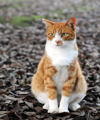

In [10]:
from io import BytesIO
import requests


def get_image(url: str) -> Image.Image:
    """Get an image from the given URL."""
    headers = {
        "User-Agent": "User-Agent: KorkDemo/0.0 (https://github.com/eyurtsev/kork/tree/main/kork;)"
    }
    response = requests.get(url, headers=headers)

    # Create a PIL image from the downloaded image data
    img = Image.open(BytesIO(response.content))
    return img


url = "https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Orange_tabby_cat_sitting_on_fallen_leaves-Hisashi-01A.jpg/1024px-Orange_tabby_cat_sitting_on_fallen_leaves-Hisashi-01A.jpg"

img = get_image(url)
resize(img, 100, 120)

In [11]:
funcs = [
    apply_blur,
    apply_contour,
    apply_detail,
    apply_edge_enhance,
    apply_edge_enhance_more,
    apply_emboss,
    apply_find_edges,
    apply_sharpen,
    apply_smooth,
    apply_smooth_more,
    resize,
    apply_sepia_filter,
    get_image,
    downscale,
    upscale,
]

In [12]:
chain = CodeChain.from_defaults(
    llm=llm,
    examples=examples_in_ast,
    interpreter=run_interpreter,
    context=funcs,
)

In [13]:
from kork.display import as_html_dict, display_html_results

In [14]:
queries = [
    "resize the image to 100,100 and smooth it a lot",
    "resize the image to 100,100 and sharpen",
    "resize the image to 100, 100 and blur and apply sepia",
    "resize the image to 100, 80, and then downscale it by another factor of 2x.",
    "resize the image to 100, 90, and detect edges",
    "resize the image to 100, 80, detect edges and finally apply sepia.",
]

In [15]:
code_results = []
for query in queries:
    code_results.append(chain(inputs={"query": query, "variables": {"img": img}}))

In [16]:
html_results = [
    as_html_dict(code_result, result_key="result") for code_result in code_results
]

,query,code,result
0,"resize the image to 100,100 and smoothit a lot","var result = apply_smooth_more( resize( img, 100, 100 ))",
1,"resize the image to 100,100 and sharpen","var result = apply_sharpen( resize( img, 100, 100 ))",
2,"resize the image to 100, 100 and blurand apply sepia","var result = apply_sepia_filter( apply_blur( resize( img, 100, 100 ) ))",
3,"resize the image to 100, 80, and thendownscale it by another factor of 2x.","var result = downscale( resize( img, 100, 80 ), 2)",
4,"resize the image to 100, 90, and detectedges","var result = apply_find_edges( resize( img, 100, 90 ))",
5,"resize the image to 100, 80, detectedges and finally apply sepia.","var result = apply_sepia_filter( apply_find_edges( resize( img, 100, 80 ) ))",

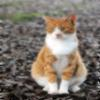
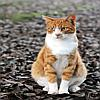
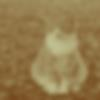
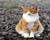
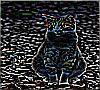
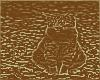

In [17]:
display_html_results(html_results, columns=["query", "code", "result"])